<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Dilema_Bias_vs_Variance_Underfitting_dan_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

#   Membuat Data Sintetis Non-Linear
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
X = X[:, np.newaxis]

In [3]:
#  Latih Tiga Model Berbeda ---
# Model 1: Underfitting (Linear, Derajat 1)
model_underfit = LinearRegression()
model_underfit.fit(X, y)
y_underfit = model_underfit.predict(X)
mse_underfit = mean_squared_error(y, y_underfit)

# Model 2: Good Fit (Polinomial, Derajat 4)
model_goodfit = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model_goodfit.fit(X, y)
y_goodfit = model_goodfit.predict(X)
mse_goodfit = mean_squared_error(y, y_goodfit)

# Model 3: Overfitting (Polinomial, Derajat 15)
model_overfit = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
model_overfit.fit(X, y)
y_overfit = model_overfit.predict(X)
mse_overfit = mean_squared_error(y, y_overfit)

In [4]:
#   Cetak Hasil Error ---
print("======= Perbandingan Mean Squared Error (MSE) =======")
print(f"MSE Model Underfit (Derajat 1): {mse_underfit:.4f}")
print(f"MSE Model Good Fit (Derajat 4): {mse_goodfit:.4f}")
print(f"MSE Model Overfit (Derajat 15): {mse_overfit:.4f}")

======= Perbandingan Mean Squared Error (MSE) =======
MSE Model Underfit (Derajat 1): 0.1630
MSE Model Good Fit (Derajat 4): 0.0164
MSE Model Overfit (Derajat 15): 0.0050


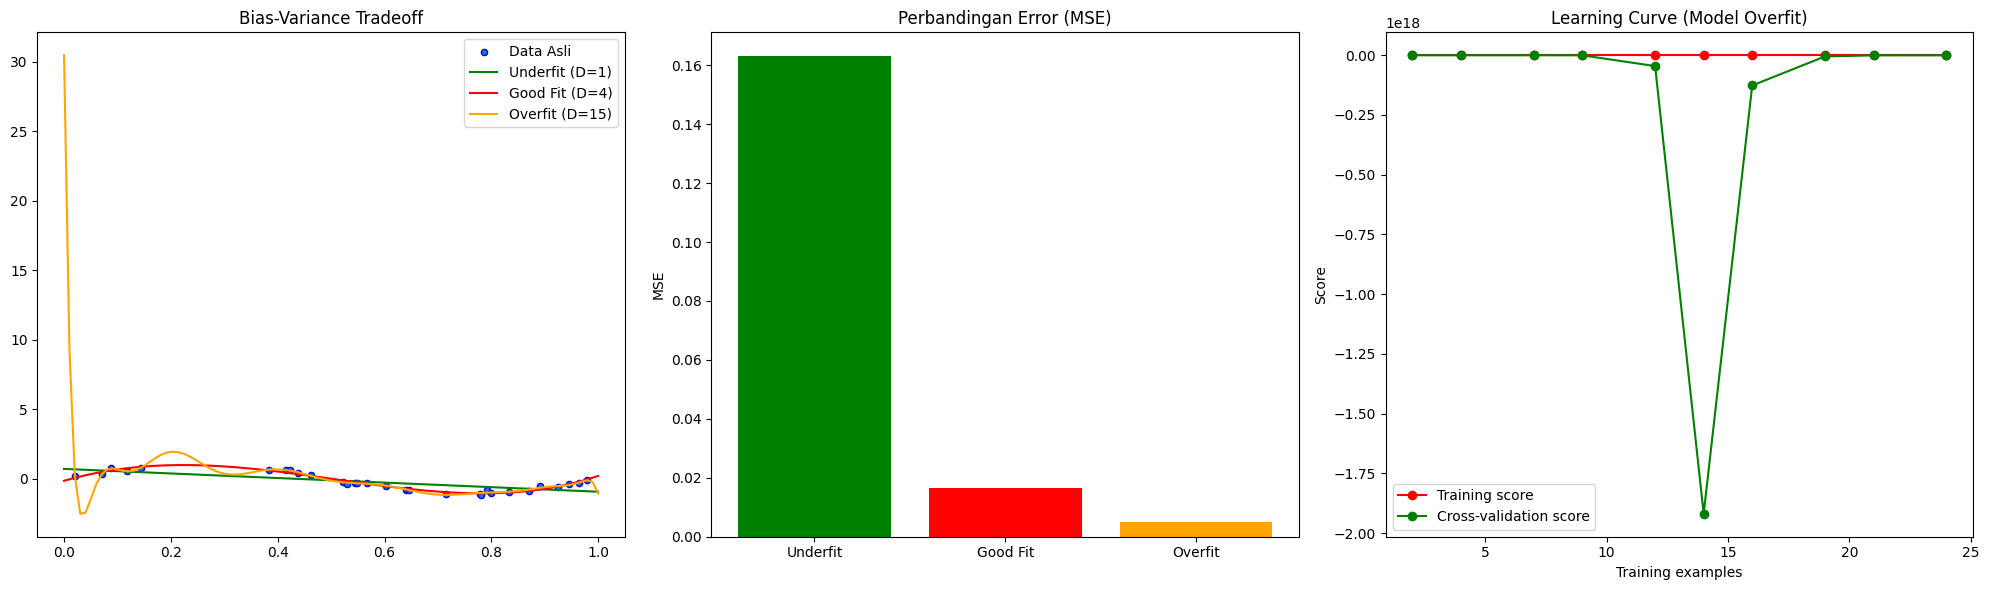

In [5]:
#   Tampilkan 3 Visualisasi ---
plt.figure(figsize=(20, 6))

# Visual 1: Perbandingan Kurva Model
plt.subplot(1, 3, 1)
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]
plt.scatter(X, y, edgecolor='b', s=20, label="Data Asli")
plt.plot(X_plot, model_underfit.predict(X_plot), color="green", label="Underfit (D=1)")
plt.plot(X_plot, model_goodfit.predict(X_plot), color="red", label="Good Fit (D=4)")
plt.plot(X_plot, model_overfit.predict(X_plot), color="orange", label="Overfit (D=15)")
plt.title("Bias-Variance Tradeoff")
plt.legend()

# Visual 2: Bagan Perbandingan MSE
plt.subplot(1, 3, 2)
models = ['Underfit', 'Good Fit', 'Overfit']
mses = [mse_underfit, mse_goodfit, mse_overfit]
plt.bar(models, mses, color=['green', 'red', 'orange'])
plt.title("Perbandingan Error (MSE)")
plt.ylabel("MSE")

# Visual 3: Learning Curve untuk Model Overfit
plt.subplot(1, 3, 3)
train_sizes, train_scores, test_scores = learning_curve(
    model_overfit, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (Model Overfit)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()